In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
firstTrajectory = np.loadtxt("trajectory1.csv", delimiter=",", dtype=float)


array([[ 0.50141 ,  0.      ,  0.      , -0.50141 ,  0.      ,  0.      ],
       [ 0.502812,  0.      ,  0.      , -0.502812,  0.      ,  0.      ],
       [ 0.504207,  0.      ,  0.      , -0.504207,  0.      ,  0.      ],
       ...,
       [ 0.423931,  0.      ,  0.      , -0.423931,  0.      ,  0.      ],
       [ 0.42216 ,  0.      ,  0.      , -0.42216 ,  0.      ,  0.      ],
       [ 0.420382,  0.      ,  0.      , -0.420382,  0.      ,  0.      ]])

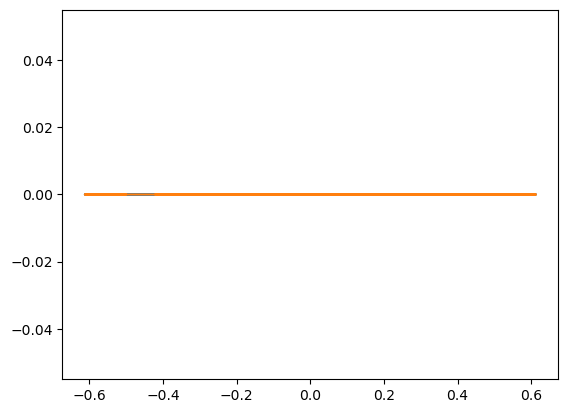

In [14]:
plt.plot(np.transpose(firstTrajectory)[0], np.transpose(firstTrajectory)[1])

plt.plot(np.transpose(firstTrajectory)[3], np.transpose(firstTrajectory)[4])
